### 必要なデータだけnpyに保存する

In [1]:
import os
import re
import urllib.request
from zipfile import ZipFile

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

### データのダウンロード
URL: 
https://archive.ics.uci.edu/ml/machine-learning-databases/00321/LD2011_2014.txt.zip

In [2]:
#データのダウンロード
URL="https://archive.ics.uci.edu/ml/machine-learning-databases/00321/LD2011_2014.txt.zip"
data_dir = "./data/"
zipfile="LD2011_2014.txt.zip"
zipfile=os.path.join(data_dir,zipfile)
file="LD2011_2014.txt"

# urllib.request.urlretrieve(URL, zipfile)
# with ZipFile(zipfile) as z:
#     z.extract(file, data_dir)
# os.remove(zipfile)

In [3]:
# # 顧客番号(cid)250番の電気消費データを抽出
# with open(os.path.join(data_dir, "LD2011_2014.txt"), "r") as fld:
#     data = []
#     cid = 250
#     for line_num, line in enumerate(fld):
#         if line.startswith("\"\";"):
#             # データを覗いてみたら一行目に対応していた。つまり一行目をスキップしているということ
#             continue
#         if line_num % 1000 == 0:
#             print("{:d} lines read".format(line_num))
#         cols = [float(re.sub(",", ".", x)) for x in
#                 line.strip().split(";")[1:]]  # .strip()は前後の空白削除
#         data.append(cols[cid])

# NUM_ENTRIES = 1000

# # 最初の10日間のデータをプロット
# plt.plot(range(NUM_ENTRIES), data[0:NUM_ENTRIES])
# plt.ylabel("electricity consumption")
# plt.xlabel("time (1pt = 15 mins)")
# plt.show()

In [4]:
# np.save(os.path.join(data_dir, "LD_250.npy"), np.array(data))

### trainとtestに分割
入力は過去の二日間とする

In [5]:
NUM_TIMESTEPS = 192  # 2日間に対応
data = np.load(os.path.join(data_dir,"LD_250.npy"))


# 正規化
data = data.reshape(-1, 1)  # データを縦ベクトルに
scaler = MinMaxScaler(feature_range=(0, 1), copy=False)
data = scaler.fit_transform(data)
# 本当はテストデータもひっくるめて正規化してしまうのは少しズルなのだが横着

# Xとyの作成
X = np.zeros((data.shape[0]-NUM_TIMESTEPS, NUM_TIMESTEPS))
y = np.zeros((X.shape[0]))
for i in range(data.shape[0] - NUM_TIMESTEPS-1):
    # yでオーバーするので-1してる
    # 1ずつ後ろにずらしてデータを作っている
    y[i] = data[i + NUM_TIMESTEPS+1]
    X[i] = data[i:i + NUM_TIMESTEPS].T  
    # データは縦ベクトルだったため転置して横ベクトルにしてる
    #(140064, 192)(サンプル数, 時間幅)
    
# ただし、kerasに投げるときは一工夫いる、なぜなら、(samples, timesteps, features)の形になっている必要があるからだ。
X = np.expand_dims(X, axis=2)
y = np.expand_dims(y, axis=1)
#(140064, 192, 1)(サンプル数, 時間幅, 次元数)

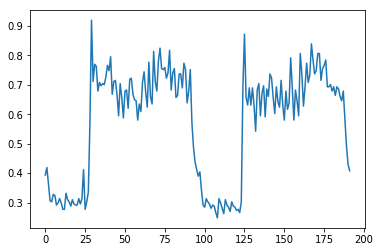

In [6]:
plt.plot(X[192,:,0])

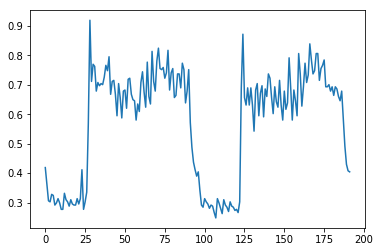

In [7]:
plt.plot(y[:192])

Xとyの対応関係は良さそう

In [8]:
# データの後半の1割をtestデータとして分割
sep = int(0.9 * X.shape[0])
X_train, X_test, y_train, y_test = X[:sep], X[sep:], y[:sep],y[sep:]
print("train", X_train.shape, "test", X_test.shape)
print("y train", y_train.shape, "y test", y_test.shape)

# np.save("./data/X_train.npy", X_train)
# np.save("./data/X_test.npy", X_test)
# np.save("./data/y_train.npy", y_train)
# np.save("./data/y_test.npy", y_test)


train (126057, 192, 1) test (14007, 192, 1)
y train (126057, 1) y test (14007, 1)


### gruに食わせるデータの可視化

In [9]:
DATA_DIR="./data/"
data = np.load(DATA_DIR + "LD_250.npy")

NUM_TIMESTEPS = 192 #二日間に対応

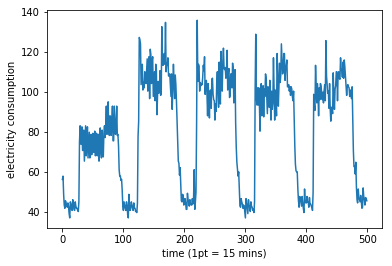

In [10]:
# 最初の10日間のデータをプロット
NUM_ENTRIES = 500
plt.plot(range(NUM_ENTRIES), data[0:NUM_ENTRIES])
plt.ylabel("electricity consumption")
plt.xlabel("time (1pt = 15 mins)")
plt.show()
# 96ptごとに1日
# これを見ると昼夜で周期的に電力使用量が変わっていることがわかる

In [11]:
data = data.reshape(-1, 1)  # データを縦ベクトルに
scaler = MinMaxScaler(feature_range=(0, 1), copy=False)
data = scaler.fit_transform(data)
data.shape

(140256, 1)

In [12]:
X = np.zeros((data.shape[0]-NUM_TIMESTEPS, NUM_TIMESTEPS))
for i in range(data.shape[0] - NUM_TIMESTEPS):
    # 1ずつ後ろにずらしてデータを作っている
    X[i] = data[i:i + NUM_TIMESTEPS].T  # データは縦ベクトルだったため転置して横ベクトルにしてる
X.shape

(140064, 192)

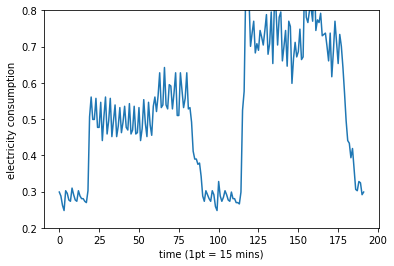

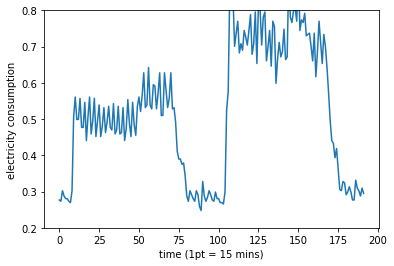

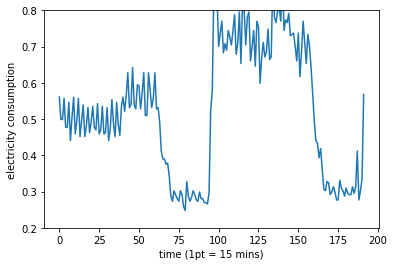

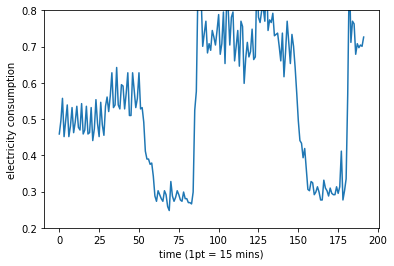

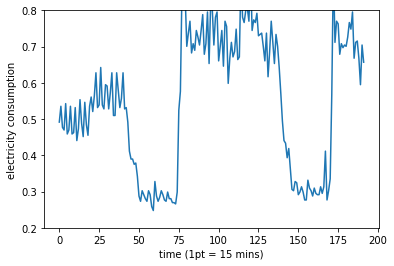

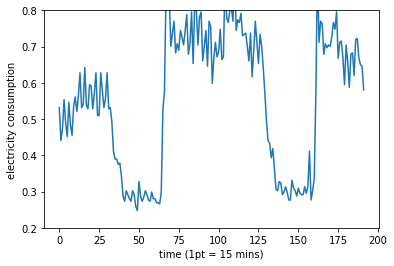

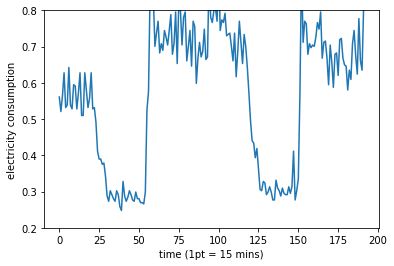

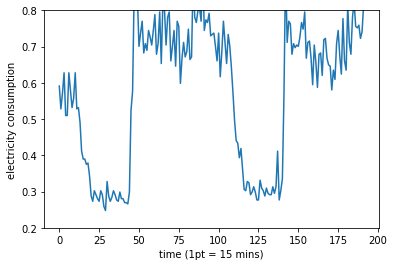

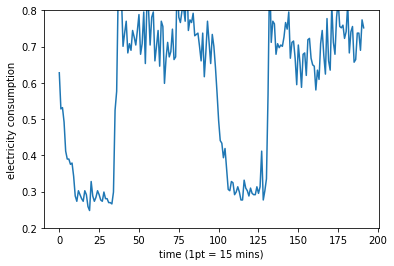

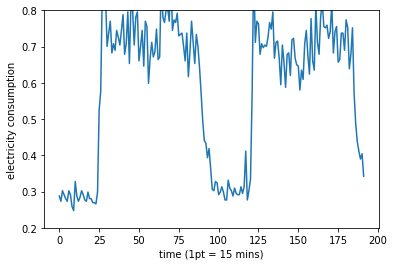

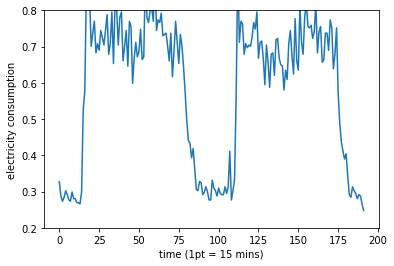

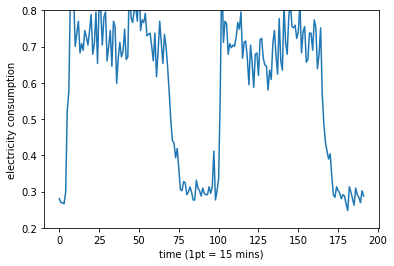

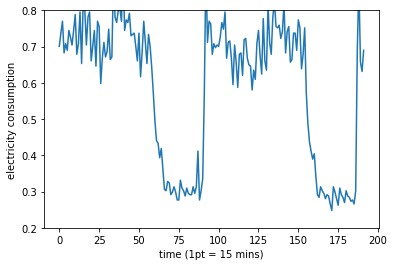

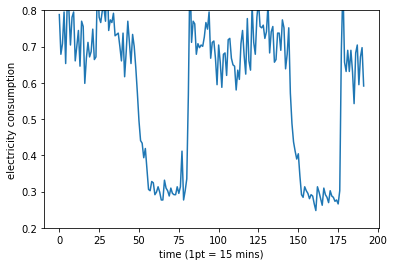

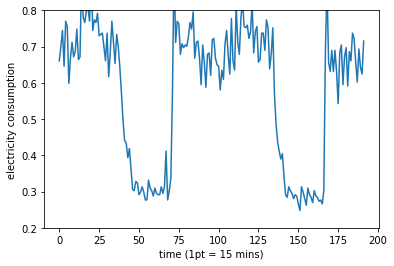

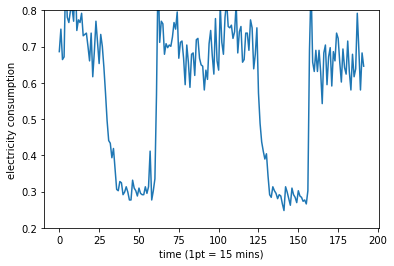

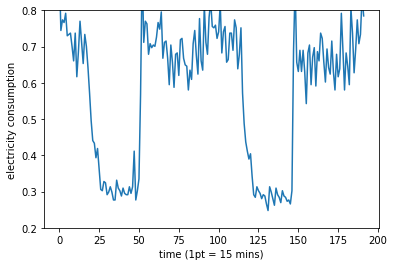

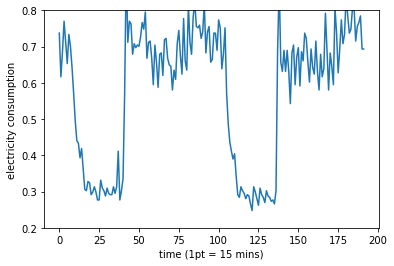

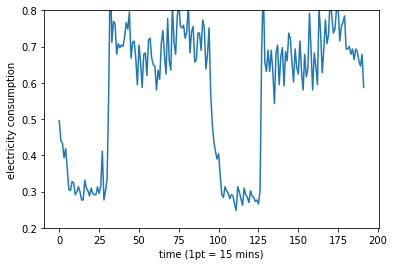

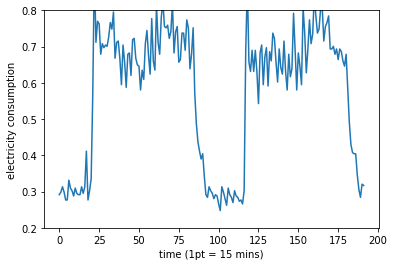

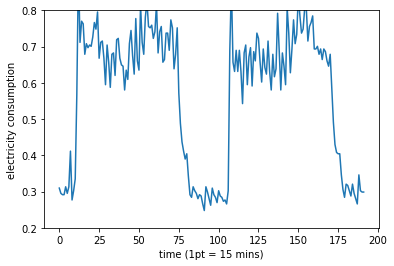

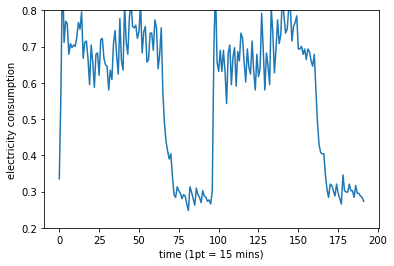

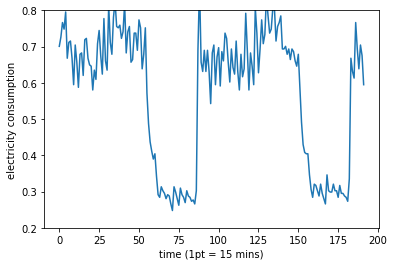

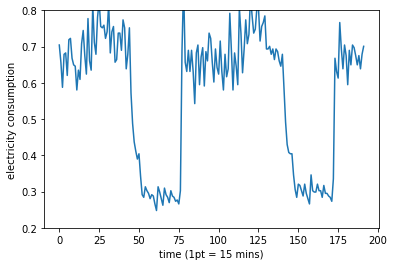

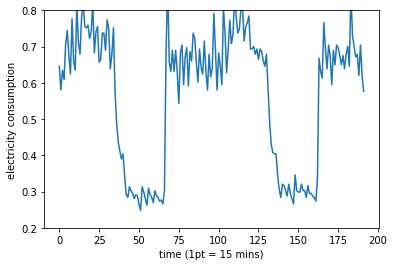

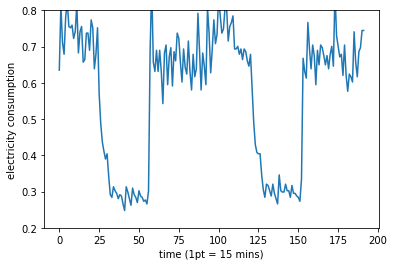

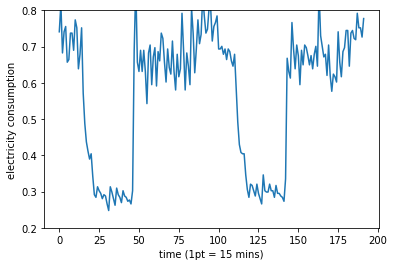

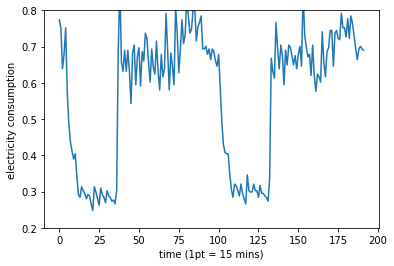

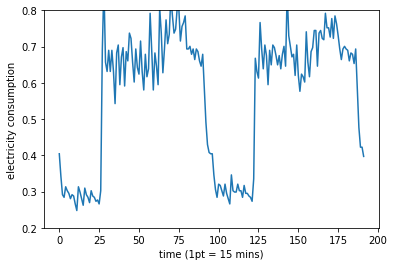

In [13]:
# データをプロット
for d in X[9:290:10]:
    plt.plot(range(d.shape[0]), d)
    plt.ylabel("electricity consumption")
    plt.xlabel("time (1pt = 15 mins)")
    plt.ylim([0.2,0.8])
    plt.show()